In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan_sanction_test.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
import numpy as np

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
data.index

RangeIndex(start=0, stop=367, step=1)

In [8]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [9]:
data.duplicated().sum()

0

In [10]:
data.size

4404

In [11]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data.Gender.mode()

0    Male
Name: Gender, dtype: object

In [13]:
data['Gender'].fillna(data['Gender'].mode(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9488\3599869649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode(), inplace=True)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data.Gender.isnull().sum()

11

In [16]:
qty = data['LoanAmount'].value_counts().reset_index()

In [17]:
qty.rename(columns = {'index':"LoanAmount","LoanAmount":"count"},inplace = True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

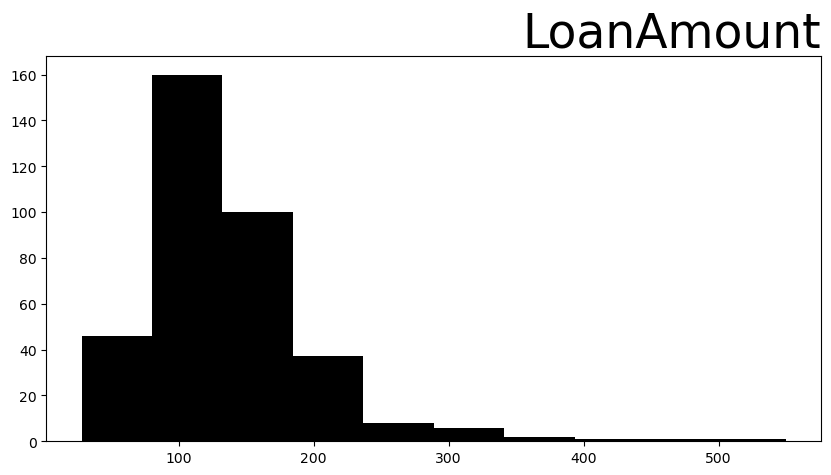

In [18]:
plt.figure(figsize = (10,5))
plt.hist(data.LoanAmount,color = 'black')
plt.title('LoanAmount', loc = 'right', size =34)
plt.xlable('LoanAmount')
plt.xticks(ticks =data.LoanAmount.unique())
plt.show()

In [ ]:
seg = data.groupby('Credit_History')[['ApplicantIncome','LoanAmount']].sum().reset_index()
type(seg)

In [ ]:
plt.figure(figsize = (10,5))

plt.bar(seg.Credit_History,seg.LoanAmount,color = 'red')
for i in range(len(seg)):
    plt.text(seg.Credit_History[i],seg.LoanAmount[i],str(seg.LoanAmount[i]),ha = 'center',va = 'bottom')
plt.grid(axis = 'y')
plt.show()

In [ ]:
scatter = data.groupby("ApplicantIncome")['LoanAmount'].sum().reset_index()

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(scatter.ApplicantIncome,scatter.LoanAmount,color ='red', marker = 'x')
for i in range(len(scatter)):
     plt.text(scatter.ApplicantIncome[i],scatter.LoanAmount[i],str(scatter.LoanAmount[i]),ha = 'center', va = 'bottom')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('loan_sanction_test.csv')
data.head()

In [ ]:
sns.barplot(data = data, y = 'ApplicantIncome', x = 'LoanAmount',errorbar=('ci',False), hue= 'Gender', palette = "Set1", orient = "horizontal")
plt.show()

In [ ]:
mode_gender = data['Gender'].mode() [0]
data['Gender'].fillna(mode_gender, inplace =True)

In [19]:
data.Gender.isnull().sum()

11

In [21]:
print(data.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [25]:
import seaborn as sns

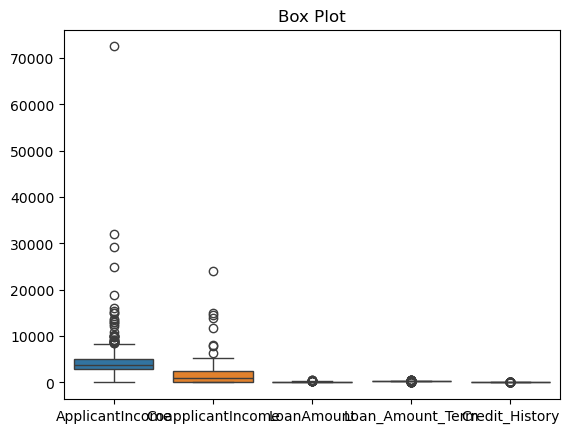

In [27]:
sns. boxplot(data = data)
plt.title("Box Plot")
plt.show()

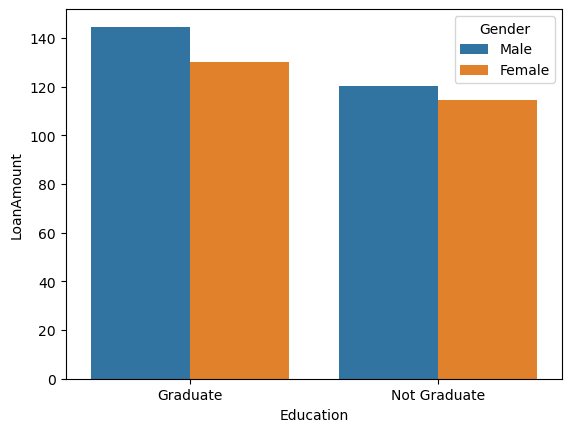

In [29]:
sns.barplot(data  = data  , x = 'Education' , y = 'LoanAmount', hue = 'Gender', errorbar = ('ci' , False ) )
plt.show()

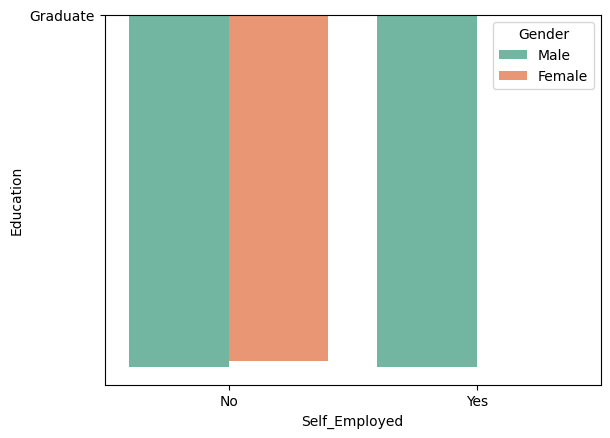

In [33]:
sns.barplot(data  = data  , x = 'Self_Employed' , y = 'Education',  errorbar = ('ci' , False ), hue = 'Gender', palette='Set2' )
plt.show()

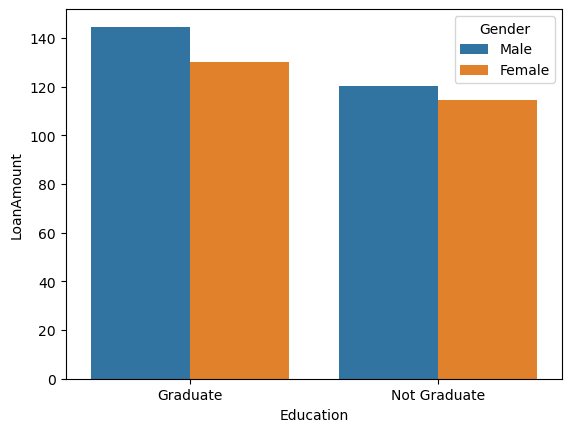

In [37]:
sns.barplot(data=data, x='Education', y='LoanAmount', errorbar = ('ci' , False ), hue = 'Gender', palette='tab10')
plt.show()

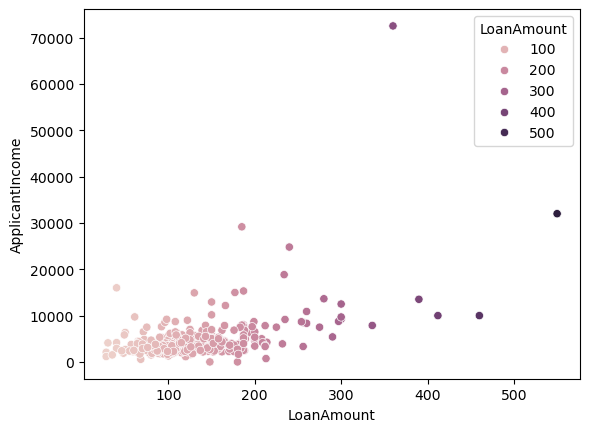

In [39]:
sns.scatterplot(data = data , x = 'LoanAmount' , y = 'ApplicantIncome', hue = 'LoanAmount')
plt.show()

In [41]:
seg = data.groupby('Education')[['LoanAmount','ApplicantIncome']].sum().reset_index()
seg

,Education,LoanAmount,ApplicantIncome
0,Graduate,39439.0,1463094
1,Not Graduate,9841.0,300561


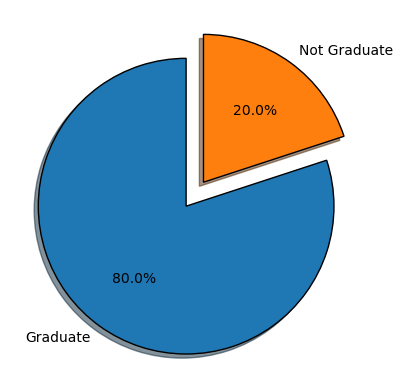

In [43]:
plt.pie(x= seg.LoanAmount, labels = seg.Education, startangle = 90, shadow = True,
       autopct = f'%1.1f%%',explode = [0.1,0.1],wedgeprops = {"edgecolor":"black","linewidth":1})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

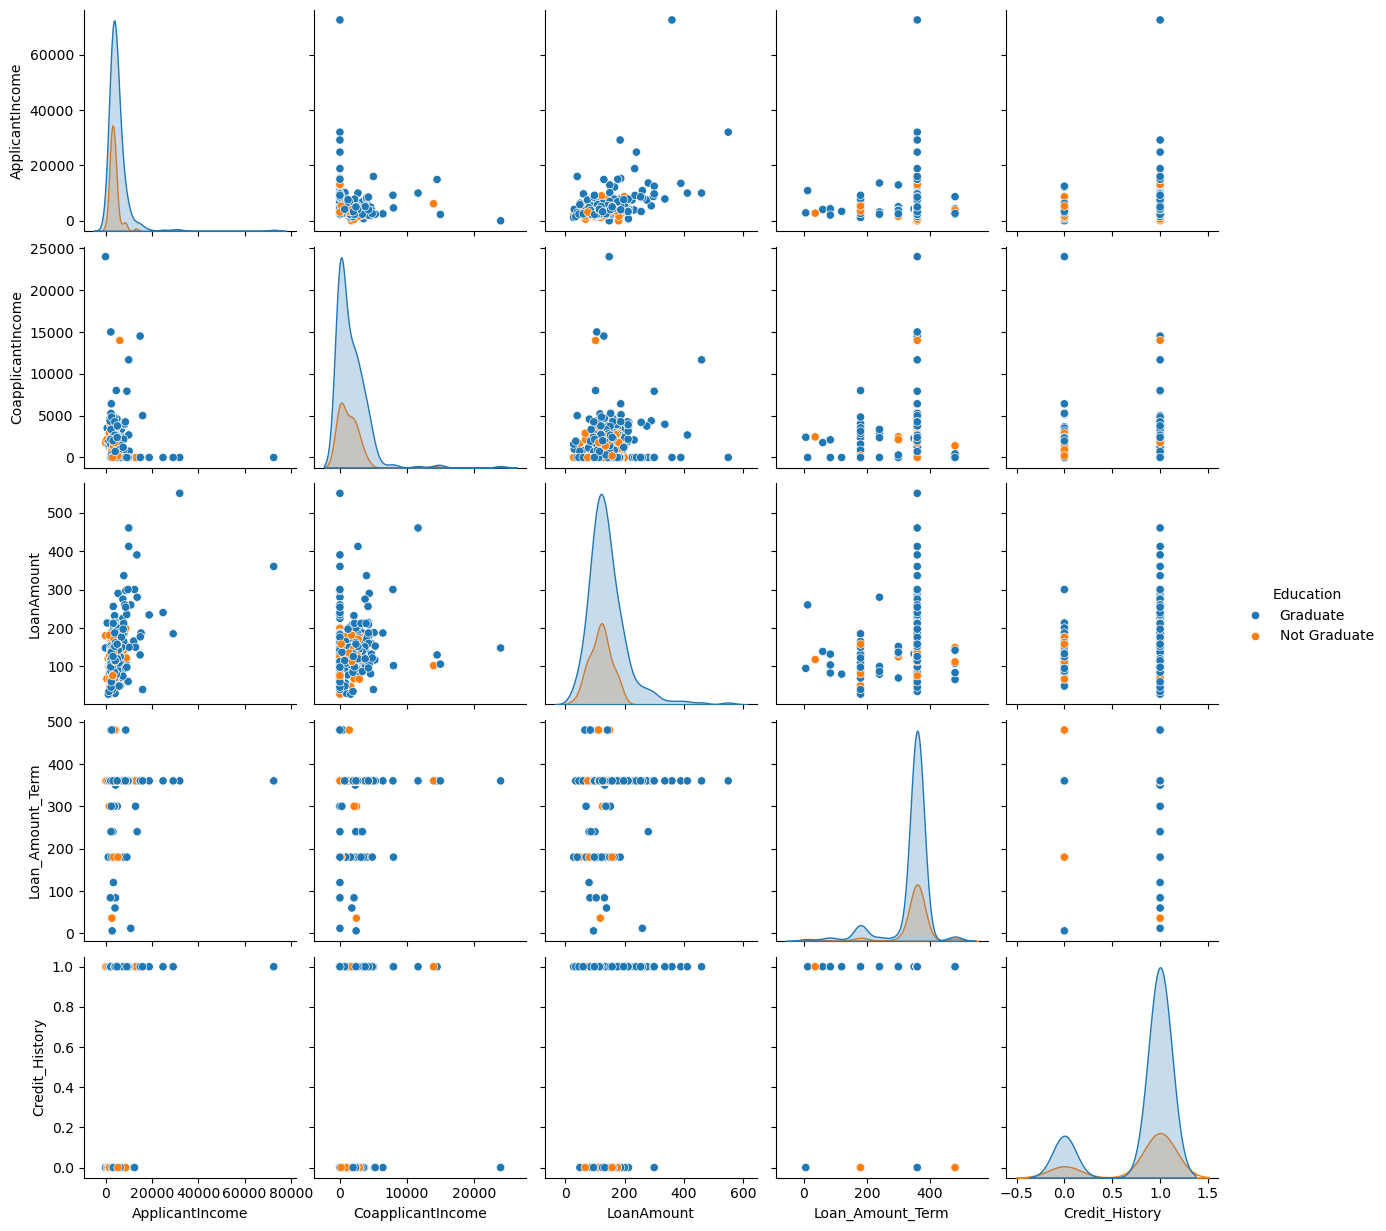

In [46]:
sns.pairplot(data , hue = 'Education' ,  kind = 'scatter')
plt.show

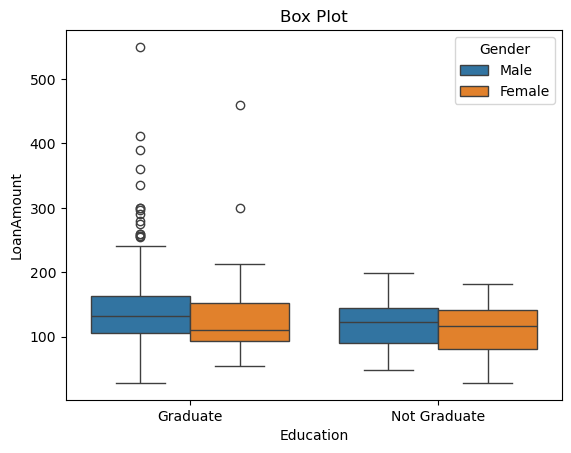

In [48]:
sns.boxplot(data , x = 'Education' , y = 'LoanAmount', hue ='Gender',)
plt.title("Box Plot")
plt.show()

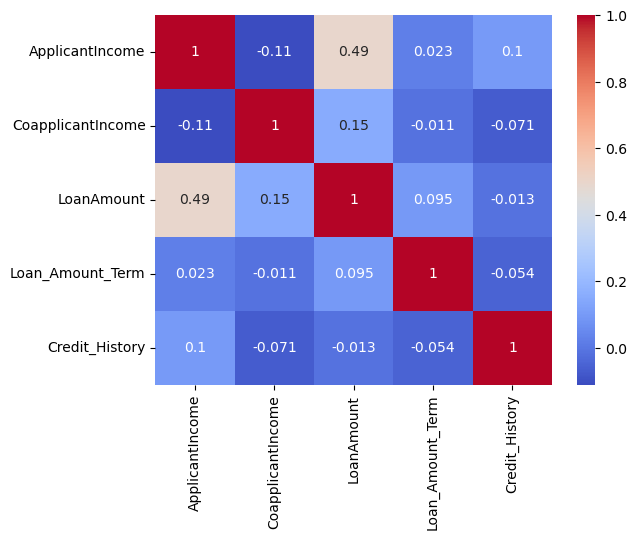

In [50]:
sns.heatmap(data.corr(numeric_only = True) , annot = True , cmap = 'coolwarm')
plt.show()

In [52]:
seg = data.groupby('Education')[['Loan_ID','LoanAmount']].sum().reset_index()
seg

,Education,Loan_ID,LoanAmount
0,Graduate,LP001015LP001022LP001031LP001035LP001059LP0010...,39439.0
1,Not Graduate,LP001051LP001054LP001055LP001056LP001067LP0010...,9841.0


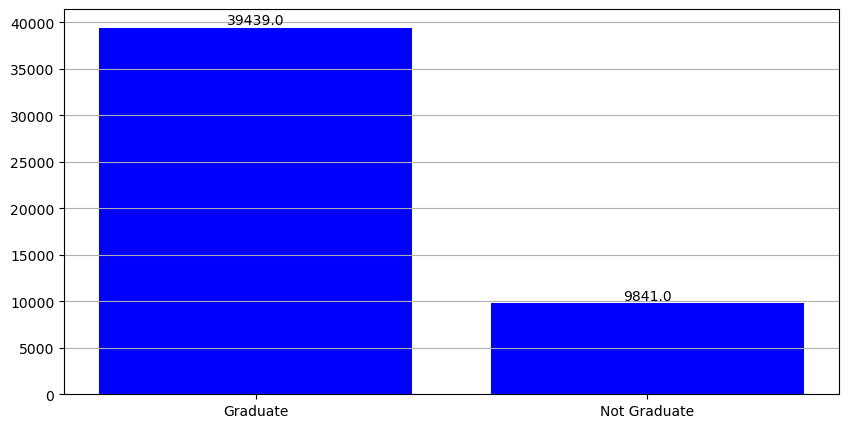

In [56]:
plt.figure(figsize = (10,5))
plt.bar(seg.Education,seg.LoanAmount,color = 'blue')
for i in range(len(seg)):
    plt.text(seg.Education[i],seg.LoanAmount[i],str(seg.LoanAmount[i]),ha= 'center',va = 'bottom')
plt.grid(axis = 'y')
plt.show()